In [231]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from io import BytesIO
from keras.models import Sequential
from keras.layers import Conv1D, Dense,Dropout,Activation,MaxPooling1D,Flatten
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import math
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [205]:
def create_lookBack(data,look_back = 3):
  val_x = []
  val_y = []
  for i in range(len(data)-look_back-1):
    val_x.append(data[i:(i+look_back),0])
    val_y.append(data[i+look_back,0])
  return np.array(val_x),np.array(val_y)  

In [206]:
def train_test_split(percent,data):
  split = int(percent*len(data))
  train = data[:split]
  test = data[split:]
  print(len(train),len(test),data.shape)
  return train,test 

In [207]:
def one_hot_encoding(data,encoding):
  label_data = []
  for value in data:
    one_hot = [0 for _ in range(encoding)]
    one_hot[int(value*10)] = 1
    label_data.append(one_hot)
  return np.array(label_data)  

In [208]:
def load_data(df):
  data = df['Num'].values
  data = data[::-1]
  data = np.reshape(data,(data.shape[0],1))
  data = data/10
  return data

In [209]:
def plot_results(actual_data,predicted_data,till):
  compare_plot = [(i,j) for i,j in zip(actual_data[0][:till],predicted_data[:till])]
  plt.plot(compare_plot)
  plt.figure(figsize=(20,10))
  plt.show()

In [210]:
uploaded = files.upload()

Saving bonum.csv to bonum (1).csv


In [354]:
df = pd.read_csv(BytesIO(uploaded['bonum.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  5090 non-null   int64
 1   Price   5090 non-null   int64
 2   Num     5090 non-null   int64
dtypes: int64(3)
memory usage: 119.4 KB


In [355]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [356]:
data = load_data(df)
train,test = train_test_split(0.85,data)

4326 764 (5090, 1)


In [357]:
look_back = 10
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)
train_x = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))


In [11]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [359]:
reg = L1L2(l1=0.001, l2=0.001)
model1 = Sequential()
model1.add(Conv1D(filters=64,padding="same", kernel_size=2,activation='relu', input_shape=(look_back, 1)))
model1.add(Conv1D(filters=64,padding="same", kernel_size=2, activation='relu'))
model1.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=128, kernel_size=2,padding="same", activation='relu'))
model1.add(Conv1D(filters=128, kernel_size=2,padding="same", activation='relu'))
model1.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

In [360]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model1.fit(train_x, train_y, epochs=200,validation_data=(test_x,test_y),batch_size=1024, verbose=2)

Epoch 1/200
5/5 - 1s - loss: 0.1706 - val_loss: 0.0992
Epoch 2/200
5/5 - 0s - loss: 0.1045 - val_loss: 0.1546
Epoch 3/200
5/5 - 0s - loss: 0.1006 - val_loss: 0.1132
Epoch 4/200
5/5 - 0s - loss: 0.0981 - val_loss: 0.1201
Epoch 5/200
5/5 - 0s - loss: 0.0938 - val_loss: 0.1273
Epoch 6/200
5/5 - 0s - loss: 0.0911 - val_loss: 0.1061
Epoch 7/200
5/5 - 0s - loss: 0.0912 - val_loss: 0.1152
Epoch 8/200
5/5 - 0s - loss: 0.0889 - val_loss: 0.1092
Epoch 9/200
5/5 - 0s - loss: 0.0877 - val_loss: 0.1011
Epoch 10/200
5/5 - 0s - loss: 0.0877 - val_loss: 0.1080
Epoch 11/200
5/5 - 0s - loss: 0.0885 - val_loss: 0.1005
Epoch 12/200
5/5 - 0s - loss: 0.0876 - val_loss: 0.0983
Epoch 13/200
5/5 - 0s - loss: 0.0867 - val_loss: 0.0984
Epoch 14/200
5/5 - 0s - loss: 0.0863 - val_loss: 0.0954
Epoch 15/200
5/5 - 0s - loss: 0.0857 - val_loss: 0.0961
Epoch 16/200
5/5 - 0s - loss: 0.0855 - val_loss: 0.0926
Epoch 17/200
5/5 - 0s - loss: 0.0858 - val_loss: 0.0956
Epoch 18/200
5/5 - 0s - loss: 0.0862 - val_loss: 0.0927
E

In [362]:
trainPredict = model1.predict(train_x, verbose=2)
testPredict = model1.predict(test_x, verbose=2)

135/135 - 0s
24/24 - 0s


In [363]:
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],1))
testPredict = np.reshape(testPredict,(testPredict.shape[0],1))
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.26 RMSE
Test Score: 0.25 RMSE


In [341]:
model1.evaluate(test1_x)

24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00


0.0

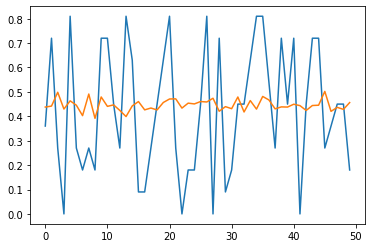

<Figure size 1440x720 with 0 Axes>

In [301]:
plot_results(trainY,trainPredict,50)

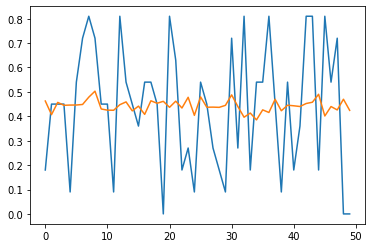

<Figure size 1440x720 with 0 Axes>

In [302]:
plot_results(testY,testPredict,50)

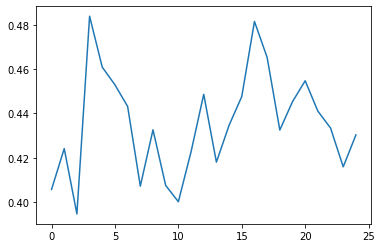

In [303]:
plt.plot(testPredict[100:125])
plt.show()

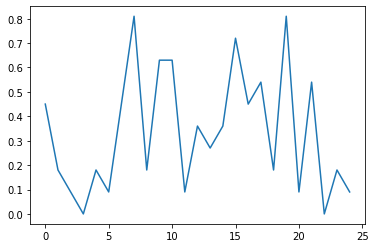

In [304]:
plt.plot(testY[0][100:125])
plt.show()